# intersection  交叉点

## 概述
函数求解其曲线在一定区间 $ [a,b] $ 中与Y轴相交点；<br>
即 $ f(x)=0 $ 在一定区间 $ [a,b] $ 中 的解。


## 伪代码 - 函数 intersection <br>
   参数定义：
   ```
   def intersection(
    function: Callable[[float], float],   # 可Callable 函数
    x0: float,                            # 初始值 X0，随机开始点之一
    x1: float)                            # 初始值 X1，随机开始点之一 
    -> float:                             # return float 类型 
    """
    function is the f we want to find its root
    x0 and x1 are two random starting points
    """
  ```
   - 步骤1：$  x_n:  = x_0, x_{n1}:= x_1 $ <br>
   - 步骤2： 循环  <br>
    - 2.1  $  x_{n2} = x_{n1} - ({f(x_{n1})-{(f(x_{n1})-f(x_n))}}/{(x_{n1}-x_n)}) $ <br>
    即：$ x_{n1} - x_{n2}  = {f(x_{n1})-{(f(x_{n1})-f(x_n))}}/{(x_{n1}-x_n)}  $ 求解 $ x_{n2} $
    - 2.2 当 $ abs(x_{n2} - x_{n1}) <= \epsilon = 10^{-5} $ 时，返回 $ x_{n2} $ <br>
     不满足条件 $ <= \epsilon $  时， $  x_n:  = x_{n1}, x_{n1}:= x_{n2} $ ，继续循环<br>

## 参考代码
```
def intersection(
    function: Callable[[float], float],   # 可Callable 函数
    x0: float,                            # 初始值 X0，随机开始点之一
    x1: float)                            # 初始值 X1，随机开始点之一 
    -> float:                             # return float 类型 
    """
    function is the f we want to find its root
    x0 and x1 are two random starting points
    """
    x_n: float = x0
    x_n1: float = x1
    while True:
        if x_n == x_n1 or function(x_n1) == function(x_n):
            raise ZeroDivisionError("float division by zero, could not find root")
        x_n2: float = x_n1 - (
            function(x_n1) / ((function(x_n1) - function(x_n)) / (x_n1 - x_n))
        )
        if abs(x_n2 - x_n1) < 10 ** -5:
            return x_n2
        x_n = x_n1
        x_n1 = x_n2
```   
## 示例
1. 求函数 $ x^3-1 $ 在 $ [-5,5] $ 与 Y  轴的相交点
2. 求函数 $ x^2-4x+3 $ 在$ [4,1000] $ 与 Y 轴的相交点

## 代码
[intersection.py]{..\src\arithmetic_analysis\intersection.py}



In [1]:
"""
Prepare
   1. sys.path 中增加 TheAlgorithms\src 子模块
   2. import matplotlib.pyplot，用于绘图使用 
   3. import numpy 用于区间分界
"""
import  matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('E:\dev\AI\TheAlgorithms\src')


**安例一** <br>
求函数 $ x^3-1 $ 在 $ [-5,5] $ 与 Y  轴的相交点


0.9999999999954654


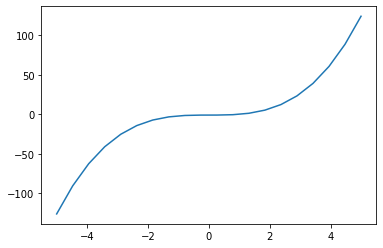

In [3]:
from arithmetic_analysis.intersection import intersection 
"""

"""
myFunction = lambda x: x ** 3  - 1 # 设定当前函数指定的function
a,b=-5,5      # 区间初始值
divPointAmt=20  # 区间间产生20个点
x=np.linspace(a,b,divPointAmt)# 区间间产生20个点
y=myFunction(x) # 设置 x,y 之间的函数关系
'''
绘制曲线
'''
plt.figure()
plt.plot(x,y)

print(intersection(myFunction, a, b)) # 显示交叉点

**安例二** <br>
求函数 $ x^2-4x+3 $ 在 $ [4,100] $ 与 Y  轴的相交点


3.0000000000000373


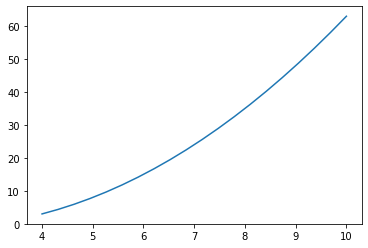

In [5]:
from arithmetic_analysis.intersection import intersection 
"""

"""
myFunction = lambda x: x ** 2 - 4 * x + 3 # 设定当前函数指定的function
a,b=4,1000      # 区间初始值
divPointAmt=20  # 区间间产生20个点
x=np.linspace(a,b,divPointAmt)# 区间间产生20个点
y=myFunction(x) # 设置 x,y 之间的函数关系
'''
绘制曲线
'''
plt.figure()
plt.plot(x,y)

print(intersection(myFunction, a, b)) # 显示交叉点

**安例三** <br>
求函数 $ \sin(x) $ 在 $ [-\pi,\pi] $ 与 Y  轴的相交点 

`[X]` 曲线坐标轴未居中，有待改进


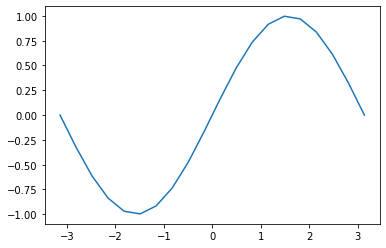

In [18]:
from arithmetic_analysis.intersection import intersection 

"""

"""
myFunction = np.sin # 设定当前函数指定的function
"""
 myFunction = math.sin 会出现异常：TypeError: only length-1 arrays can be converted to Python scalars
 原因为： 不能直接应用 math 库里的东西到 ndarray 上,得用numpy中的函数。如np.exp
"""
a,b=-np.pi,np.pi      # 区间初始值
divPointAmt=20  # 区间间产生20个点
x=np.linspace(a,b,divPointAmt)# 区间间产生20个点
y=myFunction(x) # 设置 x,y 之间的函数关系
'''
绘制曲线
'''
plt.figure()
plt.plot(x,y)

# print(intersection(myFunction, a, b)) # 显示交叉点